<a href="https://colab.research.google.com/github/Sand08/Statistics-and-Machine-Learning/blob/main/Time_Series_Apple_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Apple Stock**

[*********************100%***********************]  1 of 1 completed


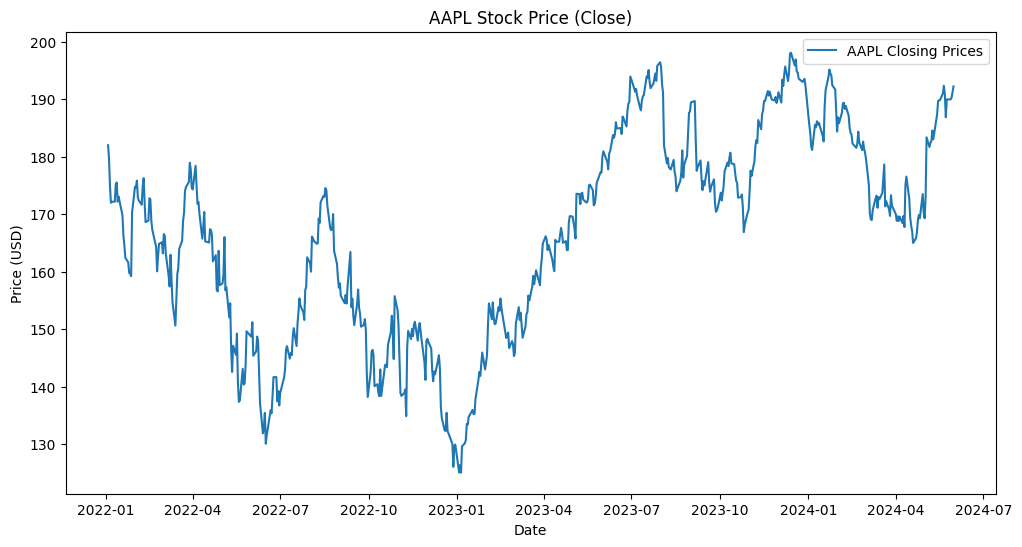

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2022-01-03,179.076584,182.009995,182.880005,177.710007,177.830002,104487900
2022-01-04,176.803802,179.699997,182.940002,179.119995,182.630005,99310400
2022-01-05,172.100876,174.919998,180.169998,174.639999,179.610001,94537600
2022-01-06,169.227921,172.000000,175.300003,171.639999,172.699997,96904000
2022-01-07,169.395172,172.169998,174.139999,171.029999,172.889999,86709100


In [55]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical stock data for Apple (AAPL)
ticker = "AAPL"  # Replace with any ticker (e.g., MSFT for Microsoft, TSLA for Tesla)
data = yf.download(ticker, start="2022-01-01", end="2024-06-01")

# Plot Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f'{ticker} Closing Prices')
plt.title(f'{ticker} Stock Price (Close)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Show the first few rows
data.head()


**Additive Decomposition**

[*********************100%***********************]  1 of 1 completed


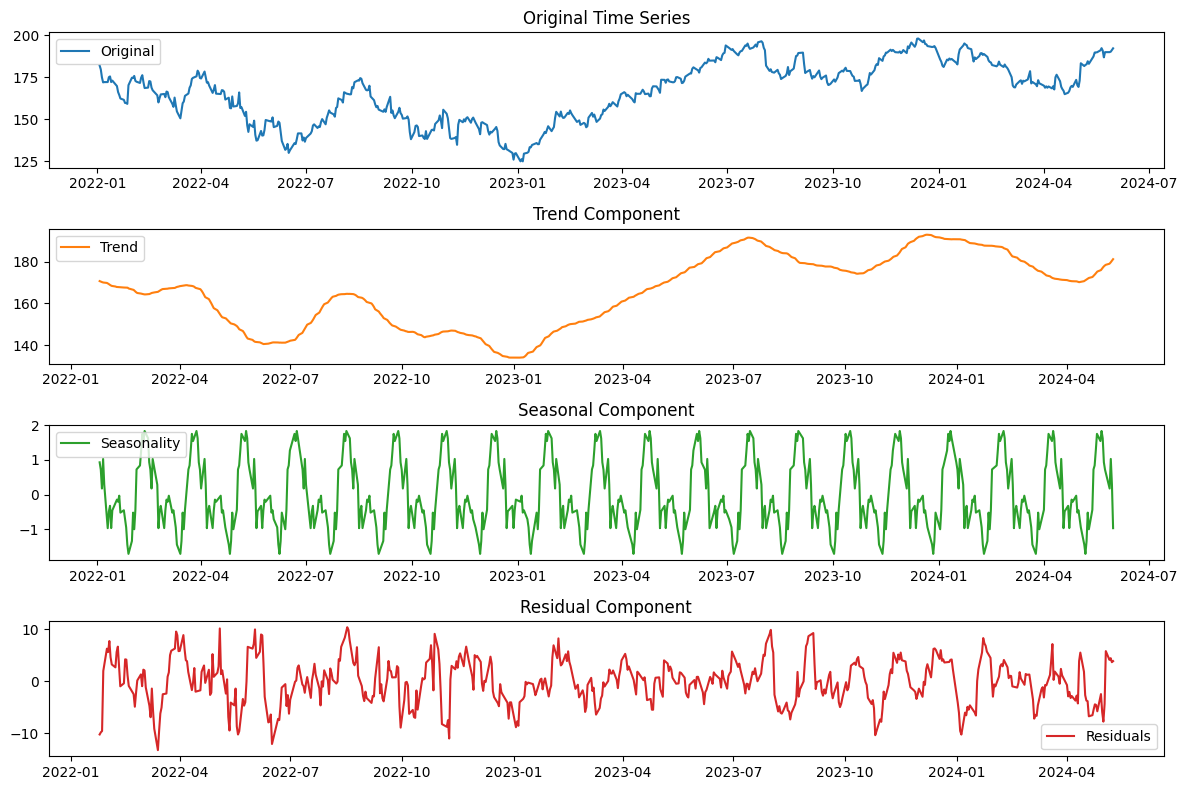

In [56]:
# Re-fetch Apple stock data due to previous resets
import yfinance as yf
data = yf.download("AAPL", start="2022-01-01", end="2024-06-01")

# Perform additive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose 'Close' prices
decomposition = seasonal_decompose(data['Close'], model='additive', period=30)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Original series
plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='Original')
plt.title('Original Time Series')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='tab:orange')
plt.title('Trend Component')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='tab:green')
plt.title('Seasonal Component')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='tab:red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


**Top plot:** The raw Apple stock Closing Prices over time (from January 2023 to May 2024).

**Observation:**
There is a general upward trend until late 2023.
The price shows some fluctuations but stabilizes after a drop around early 2024.

**Second plot:** The smoothed long-term trend of the stock prices.

**Observation:**
The trend clearly shows an upward movement through mid-2023.
Around late 2023, the trend flattens, suggesting a leveling-off of price growth.
There is a slight decline in early 2024 but a recovery toward May 2024.

**Third plot:** The seasonal variations in the stock prices (repeated patterns).

**Observation:**
The stock prices exhibit a monthly cyclical pattern (likely due to market behavior, news, or quarterly results).
Peaks and troughs appear regularly, suggesting a consistent seasonal effect.

**Bottom plot:** The irregular or random fluctuations after removing the trend and seasonality.

**Observation:**
Residuals fluctuate around zero, indicating that most of the variability is captured by the trend and seasonal components.
However, there are some spikes, especially in mid-2023 and late 2023, possibly due to unexpected market events or news.

**Multiplicative Decomposition**

[*********************100%***********************]  1 of 1 completed


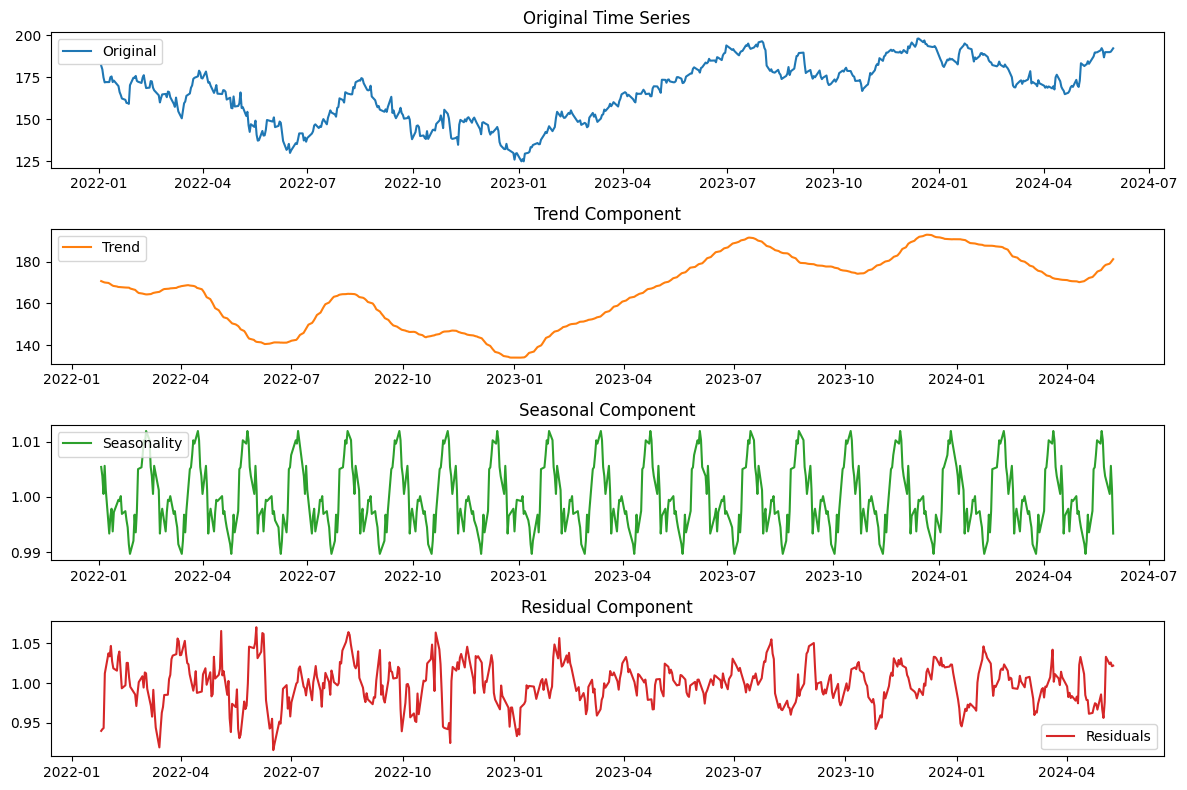

In [57]:
# Re-fetch Apple stock data due to previous resets
import yfinance as yf
data = yf.download("AAPL", start="2022-01-01", end="2024-06-01")

# Perform additive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose 'Close' prices
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=30)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Original series
plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='Original')
plt.title('Original Time Series')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='tab:orange')
plt.title('Trend Component')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='tab:green')
plt.title('Seasonal Component')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='tab:red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


**WMA**

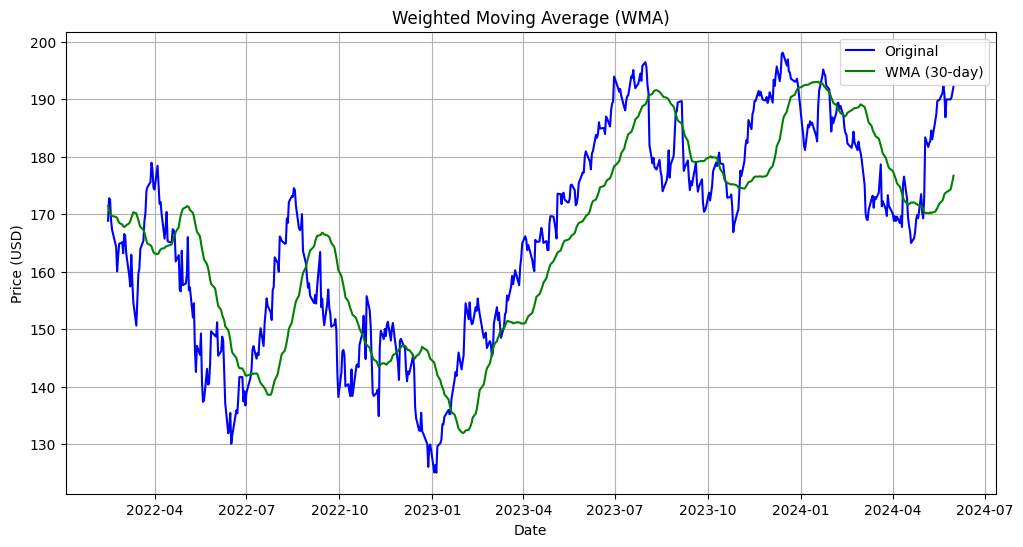

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simple Moving Average (SMA)
window_size = 30  # Example window size (30 days)

# Weighted Moving Average (WMA)
weights = np.arange(1, window_size + 1)  # Increasing weights for WMA

# Corrected WMA function
def weighted_moving_average(values, weights):
    values = values.flatten()  # Flatten in case it's multidimensional
    return np.convolve(values, weights/weights.sum(), mode='valid')

# Ensure 'Close' is a numpy array
close_values = data['Close'].dropna().values.reshape(-1, 1)  # Reshape for safety
data['WMA'] = np.nan  # Initialize WMA column
data.iloc[window_size-1:, data.columns.get_loc('WMA')] = weighted_moving_average(close_values, weights)

# Plot Original, SMA, and WMA
plt.figure(figsize=(12, 6))

# Limit the x-axis to the valid range for SMA and WMA
plt.plot(data['Close'][window_size-1:], label='Original', color='blue')  # Start from window_size-1
plt.plot(data['WMA'][window_size-1:], label=f'WMA ({window_size}-day)', color='green')  # Start from window_size-1

plt.title('Weighted Moving Average (WMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

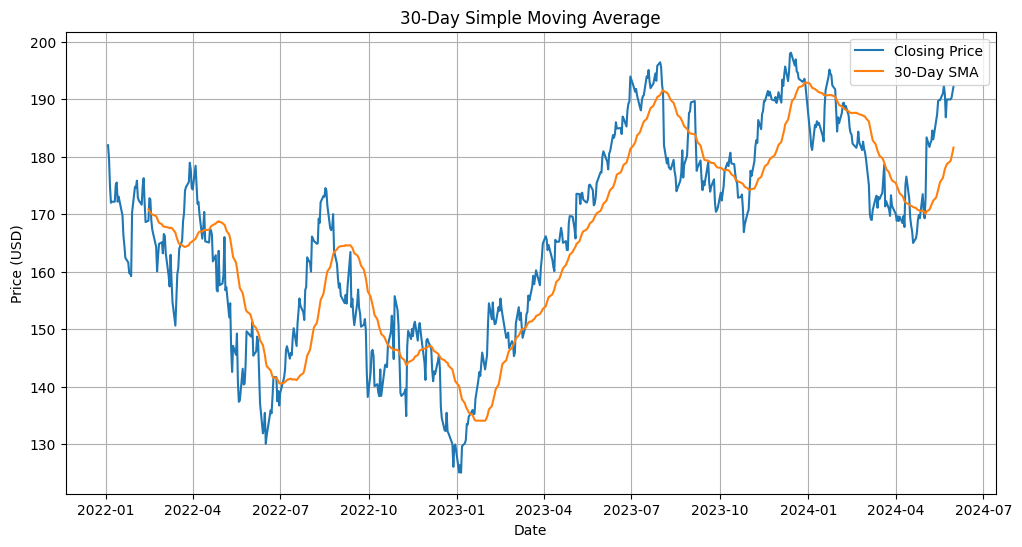

In [59]:
# prompt: plot 30 day simple moving average

# Calculate the 30-day SMA
data['SMA_30'] = data['Close'].rolling(window=30).mean()

# Plot the closing price and the 30-day SMA
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['SMA_30'], label='30-Day SMA')
plt.title('30-Day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

SES

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


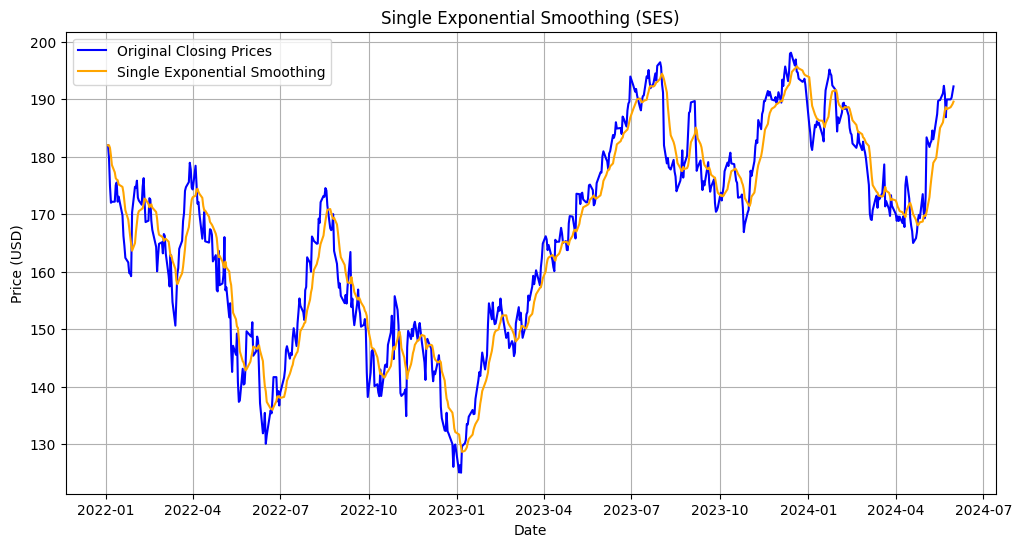

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit SES model
alpha = 0.2  # Smoothing factor
model = SimpleExpSmoothing(data['Close']).fit(smoothing_level=alpha, optimized=False)

# Add smoothed values to the data
data['SES'] = model.fittedvalues

# Plot Original vs Smoothed
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original Closing Prices', color='blue')
plt.plot(data['SES'], label='Single Exponential Smoothing', color='orange')
plt.title('Single Exponential Smoothing (SES)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


The orange SES line lags behind the blue Original Closing Prices.

It smooths out short-term fluctuations but fails to follow the upward and downward trends in the data accurately.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


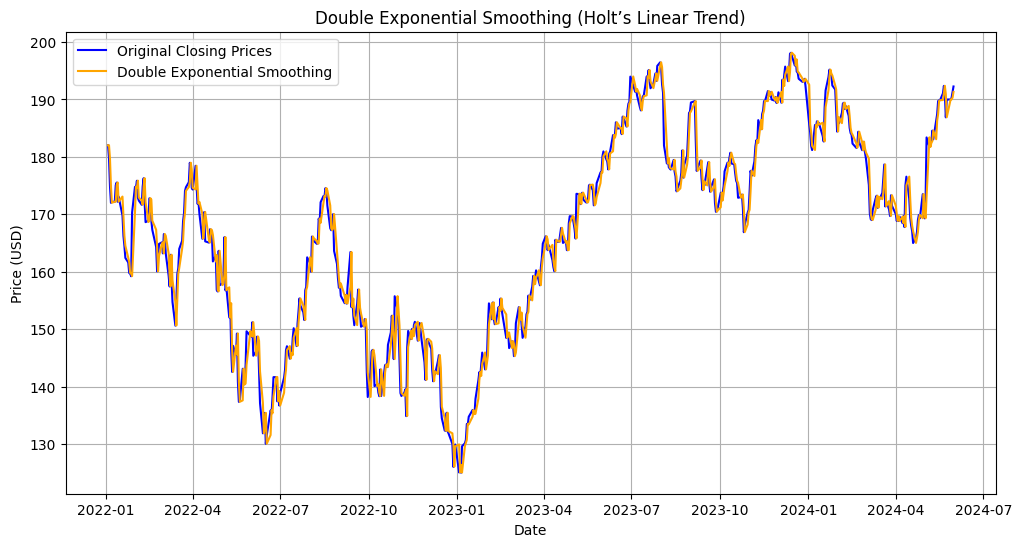

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt’s Linear Trend Model
model = ExponentialSmoothing(data['Close'], trend='add', seasonal=None).fit()

# Add fitted values to the data
data['DES'] = model.fittedvalues

# Plot Original vs Smoothed
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original Closing Prices', color='blue')
plt.plot(data['DES'], label='Double Exponential Smoothing', color='orange')
plt.title('Double Exponential Smoothing (Holt’s Linear Trend)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


The orange Double Exponential Smoothing line closely follows the blue Original Closing Prices, especially during upward and downward trends.

It smooths the data while capturing the trend more effectively than SES.

During flat or non-trending periods, the smoothing line remains closer to the original series.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


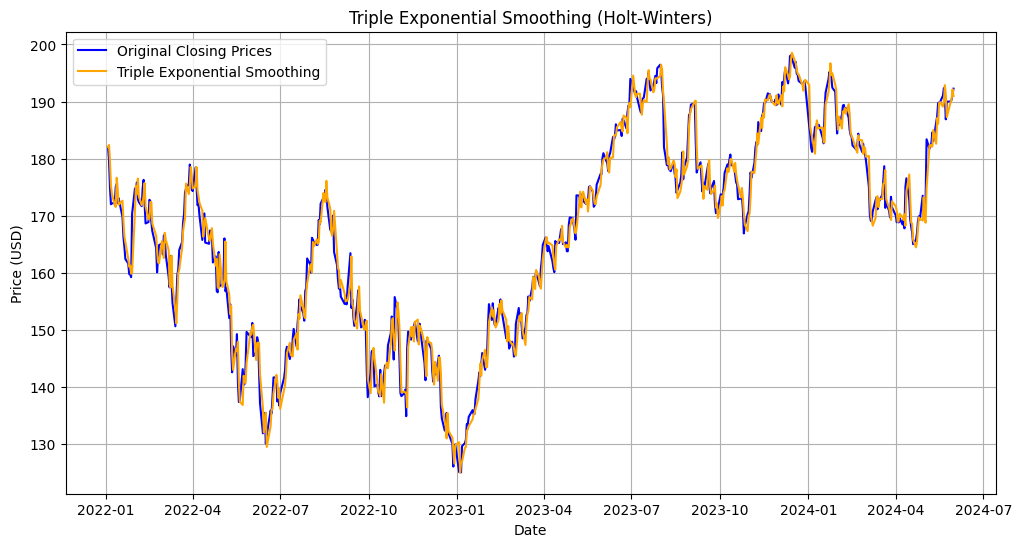

In [62]:
# Fit Holt-Winters Model with seasonality
model = ExponentialSmoothing(data['Close'], trend='add', seasonal='add', seasonal_periods=50).fit()

# Add fitted values to the data
data['TES'] = model.fittedvalues

# Plot Original vs Smoothed
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original Closing Prices', color='blue')
plt.plot(data['TES'], label='Triple Exponential Smoothing', color='orange')
plt.title('Triple Exponential Smoothing (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


The orange Triple Exponential Smoothing line fits the data the best, especially where regular seasonal cycles are present.

It captures short-term fluctuations, seasonal peaks, and the long-term trend simultaneously.

The model responds quickly to changes in the stock price without over-smoothing.

**Prophet Model**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1rd50848/zvroriw1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1rd50848/ss7mrfm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32375', 'data', 'file=/tmp/tmp1rd50848/zvroriw1.json', 'init=/tmp/tmp1rd50848/ss7mrfm6.json', 'output', 'file=/tmp/tmp1rd50848/prophet_model1o8mgc8c/prophet_model-20241217201502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:15:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:15:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version,

Trend:
The trend component shows the overall direction of the stock price over time.

Seasonality:
The seasonality component shows any repeating patterns in the data, such as weekly or yearly cycles.

Uncertainty Interval:
The uncertainty interval (shaded area around the forecast) represents the confidence in the prediction.
A wider interval indicates less certainty.


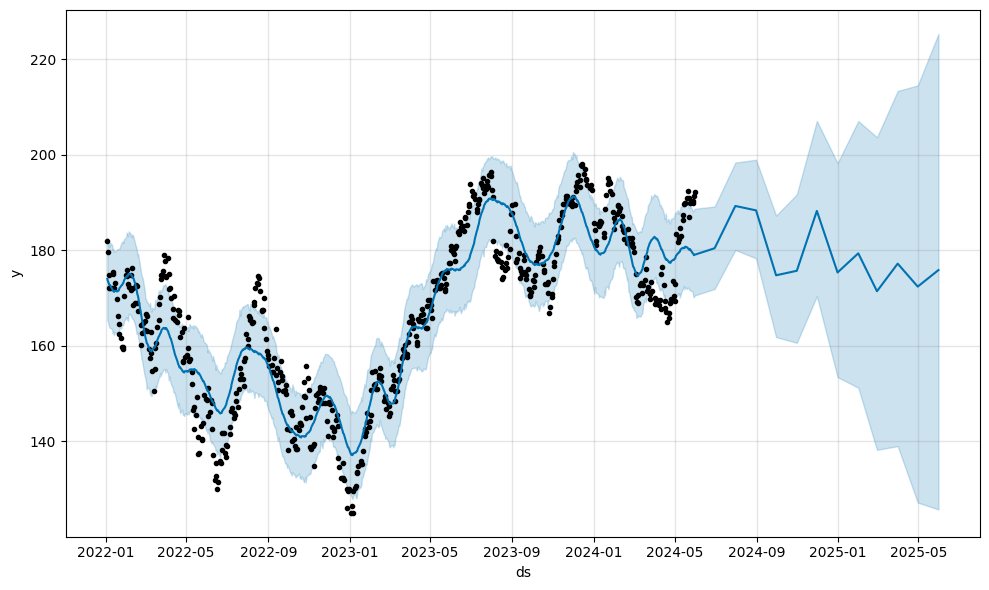

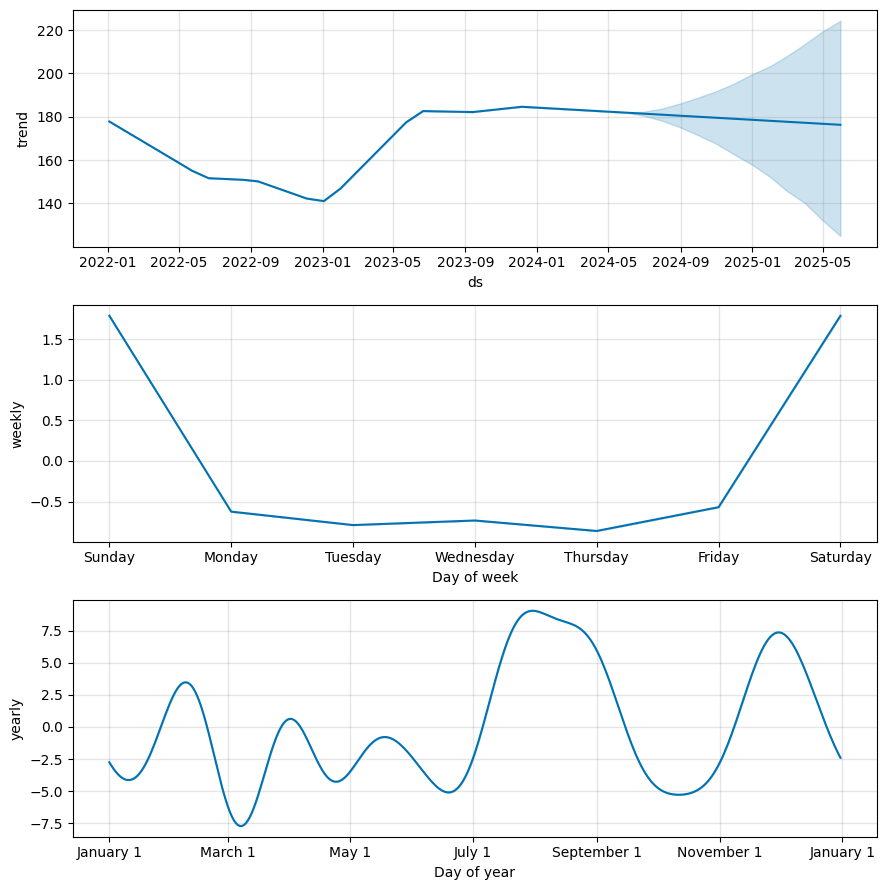

In [68]:


from prophet import Prophet
# Prepare data for Prophet
data_prophet = data[['Close']].reset_index()
data_prophet.columns = ['ds', 'y']

# Create and fit the Prophet model
model = Prophet()
model.fit(data_prophet)

# Create future dates for forecasting
future = model.make_future_dataframe(periods=12, freq='M')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)

# Plot components
fig2 = model.plot_components(forecast)

# Interpret the trend, seasonality, and uncertainty interval
print("Trend:")
print("The trend component shows the overall direction of the stock price over time.")

print("\nSeasonality:")
print("The seasonality component shows any repeating patterns in the data, such as weekly or yearly cycles.")

print("\nUncertainty Interval:")
print("The uncertainty interval (shaded area around the forecast) represents the confidence in the prediction.")
print("A wider interval indicates less certainty.")

**Forecast:**

The blue line forecasts the stock prices for the next 12 months.

The predictions are relatively stable but show some fluctuations.

**Uncertainty Interval:**

The shaded area around the forecast widens over time.
Interpretation: The further into the future the prediction, the less certain the model becomes. This is normal because uncertainty increases as we forecast farther out.

**Observation:**

The stock price is higher on Sundays and Saturdays.
Prices drop significantly on Mondays and remain low on weekdays.

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Train-Test Split
train = data['Close'][:-12]  # Training data (all except last 12 months)
test = data['Close'][-12:]   # Test data (last 12 months)

# ------------------------------
# Exponential Smoothing Model
# ------------------------------
# Fit the Holt-Winters model
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast for test set
hw_forecast = hw_model.forecast(12)

# ------------------------------
# Prophet Model
# ------------------------------
# Prepare data for Prophet
data_prophet = data[['Close']].reset_index()
data_prophet.columns = ['ds', 'y']

# Train Prophet model only on training data
model_prophet = Prophet()
model_prophet.fit(data_prophet.iloc[:-12])

# Create future dates for forecasting
future = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast_prophet = model_prophet.predict(future)

# Extract the predicted values for the test period
prophet_forecast = forecast_prophet['yhat'][-12:]

# ------------------------------
# Calculate Metrics
# ------------------------------
# Convert forecasts and actuals to same format
actuals = test.values
hw_preds = hw_forecast.values
prophet_preds = prophet_forecast.values

# Calculate MAE and RMSE
mae_hw = mean_absolute_error(actuals, hw_preds)
rmse_hw = np.sqrt(mean_squared_error(actuals, hw_preds))

mae_prophet = mean_absolute_error(actuals, prophet_preds)
rmse_prophet = np.sqrt(mean_squared_error(actuals, prophet_preds))

# Print Results
print("Accuracy Metrics Comparison:")
print("\nHolt-Winters (Exponential Smoothing):")
print(f"MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}")

print("\nProphet:")
print(f"MAE: {mae_prophet:.2f}, RMSE: {rmse_prophet:.2f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1rd50848/j_h_xqgd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1rd50848/xi7ipnin.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/loc

Accuracy Metrics Comparison:

Holt-Winters (Exponential Smoothing):
MAE: 2.75, RMSE: 2.91

Prophet:
MAE: 22.59, RMSE: 24.10


Why Holt-Winters Performed Better:

Regular Seasonality:

Holt-Winters explicitly handles additive trend and seasonality, which might align better with your data.

Short-term Forecasting:

Holt-Winters works very well for short forecasting windows (12 months), where the patterns are stable.

**Prophet Default Settings:**

Prophet might require parameter tuning to better align with the data patterns.


Seasonality Mode: Adjust additive/multiplicative seasonality.

Seasonal Periods: Explicitly specify weekly/monthly/yearly cycles.